# 問1

地域ごとに7つの特徴量を含んでいます。

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import sklearn.model_selection

X = pd.read_excel("data/chapter09_exercise.xlsx")
y = X["観光客数"]
X2 = X.copy().drop("観光客数", axis=1)
X2.head()

,日照時間,気温,満足度（過去の観光客の評価）,最寄り空港からの距離,観光スポット数,宿泊料金,飲食料金
0,7.043493,6.523518,0.838059,151.654234,8.370991,6988.621085,2782.833575
1,12.863148,9.497309,0.118371,125.872237,9.188783,12061.917036,2487.862917
2,12.086588,4.885457,1.181586,120.864715,22.409714,8932.558436,2439.756368
3,10.572015,5.028971,-1.065509,95.199223,15.369133,8435.672458,2119.625405
4,10.277650,10.119733,-1.024849,168.904473,23.323409,9169.456916,2427.669816


# 問2

学習用の地域数は225、評価用の地域数は75です。
通し番号208、188などが評価用として選ばれています。


In [15]:
[
    X_train,
    X_test,
    y_train,
    y_test
] = sklearn.model_selection.train_test_split(X2, y, test_size=0.25, random_state=0)

print(len(X_train))
print(len(X_test))

225
75


In [16]:
X_test.head()

,日照時間,気温,満足度（過去の観光客の評価）,最寄り空港からの距離,観光スポット数,宿泊料金,飲食料金
208,8.781781,2.952363,2.009709,141.265983,11.684373,9445.046957,2742.307090
188,16.121668,3.668849,-0.047755,103.675634,14.662096,9620.989613,986.118540
12,9.546690,7.874560,-0.420974,201.654824,11.544656,9743.900580,1147.659962
221,12.325240,2.607061,1.165800,128.221775,12.003949,10410.705181,2679.353605
239,6.761867,5.044803,0.098878,106.213261,16.553503,10382.230558,1748.334173


# 問3

学習用の決定係数は0.97、二乗平均平方根誤差は253、評価用の決定係数は0.77、二乗平均平方根誤差は667です。学習用に比べると、評価用の決定係数が下がるだけでなく、誤差（＝予想値と正解の差）も大きくなっています。

In [17]:
model_rfr = RandomForestRegressor(random_state=0)
model_rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [9]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_train_pred = model_rfr.predict(X_train)
y_test_pred = model_rfr.predict(X_test)

rmse_train = mean_squared_error(
    y_train,
    y_train_pred,
    squared=False
)
rmse_test = mean_squared_error(
    y_test,
    y_test_pred,
    squared=False
)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("RMSE 学習：", rmse_train, ", RMSE 評価：", rmse_test)
print("R-sq 学習：", r2_train, ", R-sq 評価：", r2_test)

RMSE 学習： 253.4301092761771 , RMSE 評価： 666.8941257543744
R-sq 学習： 0.970941186874868 , R-sq 評価： 0.7775546783595759


通し番号208では、観光客数5519人のところ、4895人と予想しています。誤差は624人です。

In [10]:
test_results = pd.DataFrame({
    "y_test": y_test,
    "y予想": y_test_pred
})
test_results.head()

,y_test,y予想
208,5519.548587,4895.466957
188,4182.686620,4642.420872
12,6653.174716,7079.282704
221,5529.899265,5442.697027
239,5562.449096,5805.009233


# 問4

観光客数の予想には、気温や観光スポット数の重要度が高いことがわかります。一方、飲食料金や日照時間はほかの特徴量にくらべると重要度が低くなっています。気温を変えることはできませんが、観光スポットの数を増やすことで集客につながる可能性がありそうです。

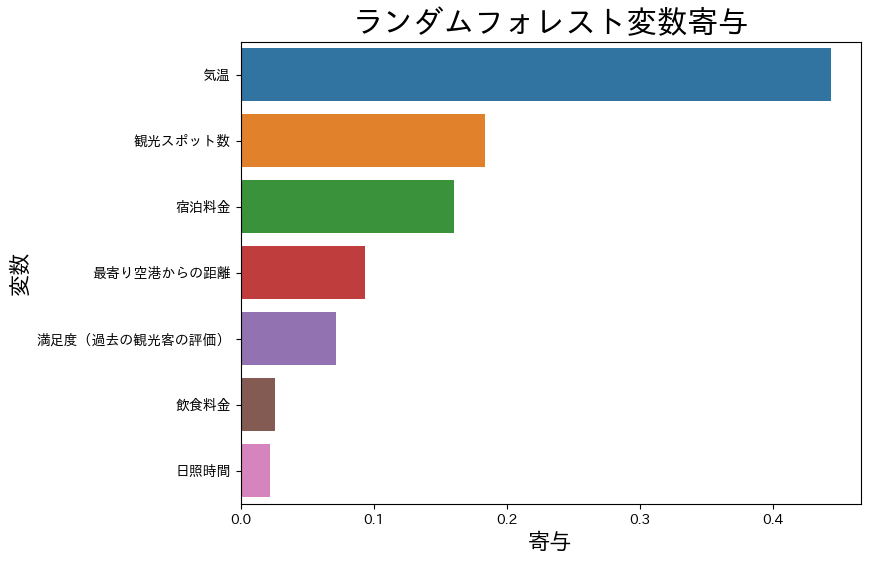

In [11]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

rf_imp = pd.DataFrame({
    "寄与": model_rfr.feature_importances_,
    "変数": X2.columns,
})
rf_imp = rf_imp.sort_values(by="寄与", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(
    x="寄与",
    y="変数",
    data=rf_imp,
    hue="変数",
    dodge=False
)
plt.title("ランダムフォレスト変数寄与", fontsize=22)
plt.ylabel("変数", fontsize=16)
plt.xlabel("寄与", fontsize=16)

plt.show()